In [1]:
import gym
import random
import pandas as pd
%matplotlib inline

In [2]:
env = gym.make('gym_push:evalumap1-v0')

EvalUMAP1-v0 environment


In [3]:
train_contexts, train_notifications, train_engagements = env.request_data()

In [4]:
testing_contexts = env.request_data(test=True)

In [5]:
x=train_notifications.iloc[:,[5,7,8]]

In [6]:
# Categorical boolean mask
categorical_feature_mask = train_contexts.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = train_contexts.columns[categorical_feature_mask].tolist()

In [7]:
import category_encoders as ce
ce_ordinal = ce.OrdinalEncoder(cols=categorical_cols)
# fit and transform and you will get the encoded data
testing_contexts=ce_ordinal.fit_transform(testing_contexts)
train_contexts=ce_ordinal.fit_transform(train_contexts)

In [8]:
from sklearn.tree import DecisionTreeClassifier
mdl = DecisionTreeClassifier(random_state=1)
mdl.fit(train_contexts, x)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [9]:
pred1=mdl.predict(testing_contexts)

In [10]:
pred1

array([['private', 'high', 'high'],
       ['private', 'high', 'low'],
       ['private', 'low', 'low'],
       ...,
       ['private', 'moderate', 'low'],
       ['private', 'high', 'low'],
       ['private', 'high', 'low']], dtype=object)

In [11]:
train_contexts=pd.concat([train_contexts, x], axis=1)

In [12]:
# Categorical boolean mask
categorical_feature_mask = train_contexts.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = train_contexts.columns[categorical_feature_mask].tolist()

In [13]:
import category_encoders as ce
ce_ordinal = ce.OrdinalEncoder(cols=categorical_cols)
# fit and transform and you will get the encoded data
train_contexts=ce_ordinal.fit_transform(train_contexts)

In [14]:
x=train_notifications.iloc[:,[1,2,3,4]]
testing_contexts

,timeAppLastUsed,timeOfDay,dayOfWeek,unlockCount_prev2,uniqueAppsLaunched_prev2,dayOfMonth
8148,1,1,1,2,14,13
662,1,2,1,2,11,13
6451,1,2,1,1,8,13
3820,2,2,1,6,15,13
1711,1,2,1,2,17,13
...,...,...,...,...,...,...
3685,1,4,3,5,13,13
1203,7,4,3,3,9,13
7713,7,4,3,5,10,13
6812,6,5,3,2,4,13


In [15]:
import numpy as np
testing_contexts=np.asarray(testing_contexts)
testing_contexts=np.concatenate((testing_contexts, pred1),axis=1)
testing_contexts=pd.DataFrame(testing_contexts)

In [16]:
# Categorical boolean mask
categorical_feature_mask = testing_contexts.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = testing_contexts.columns[categorical_feature_mask].tolist()

import category_encoders as ce
ce_ordinal = ce.OrdinalEncoder(cols=categorical_cols)
# fit and transform and you will get the encoded data
testing_contexts=ce_ordinal.fit_transform(testing_contexts)

In [17]:
from sklearn.tree import DecisionTreeClassifier
mdl = DecisionTreeClassifier(random_state=1)
mdl.fit(train_contexts, x)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [18]:
pred2=mdl.predict(testing_contexts)
pred2=pd.DataFrame(pred2)

In [19]:
train_contexts=pd.concat([train_contexts, x], axis=1)

In [20]:
# Categorical boolean mask
categorical_feature_mask = train_contexts.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = train_contexts.columns[categorical_feature_mask].tolist()

import category_encoders as ce
ce_ordinal = ce.OrdinalEncoder(cols=categorical_cols)
# fit and transform and you will get the encoded data
train_contexts=ce_ordinal.fit_transform(train_contexts)

In [21]:
testing_contexts=pd.concat([testing_contexts, pred2], axis=1)

In [22]:
testing_contexts.columns=[train_contexts.columns]

In [23]:
# Categorical boolean mask
categorical_feature_mask = testing_contexts.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = testing_contexts.columns[categorical_feature_mask].tolist()

import category_encoders as ce
ce_ordinal = ce.OrdinalEncoder(cols=categorical_cols)
# fit and transform and you will get the encoded data
testing_contexts=ce_ordinal.fit_transform(testing_contexts)

In [24]:
x=train_notifications.iloc[:,[0,6]]


In [25]:
from sklearn.tree import DecisionTreeClassifier
mdl = DecisionTreeClassifier(random_state=1)
mdl.fit(train_contexts, x)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [26]:
pred3=mdl.predict(testing_contexts)
pred3=pd.DataFrame(pred3)
pred1=pd.DataFrame(pred1)

In [27]:
pred=pd.concat(([pred3[0],pred2,pred1[0],pred3[1],pred1[1],pred1[2]]), axis=1)

In [28]:
pred.columns=train_notifications.columns
pred

,appPackage,category,ledARGB,priority,vibrate,visibility,subject,enticement,sentiment
0,ie.rte.news,unknown,transparent,default,unknown,private,unknown,high,high
1,ie.rte.news,unknown,transparent,default,unknown,private,unknown,high,low
2,ie.rte.news,msg,transparent,default,unknown,private,unknown,low,low
3,com.android.mms,email,transparent,default,unknown,public,team sports,low,high
4,ie.rte.news,unknown,transparent,default,unknown,private,unknown,low,low
...,...,...,...,...,...,...,...,...,...
9307,com.facebook.orca,email,green,max,0200200200,private,unknown,moderate,low
9308,ie.rte.news,unknown,transparent,default,unknown,private,legal,low,low
9309,com.google.android.gm,alarm,transparent,high,unknown,private,unknown,moderate,low
9310,ie.rte.news,unknown,transparent,default,unknown,private,tv & video,high,low


In [29]:
pred=pd.DataFrame(pred)
pred.columns=train_notifications.columns

evaluating.
evaluating..
evaluating...
evaluating....


<Figure size 432x432 with 0 Axes>

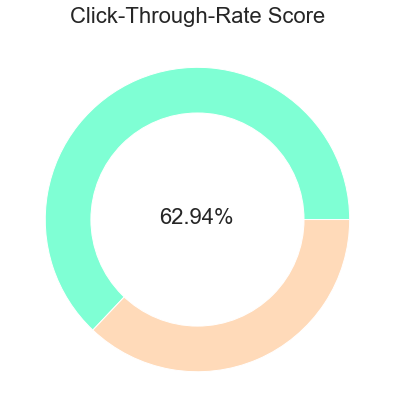

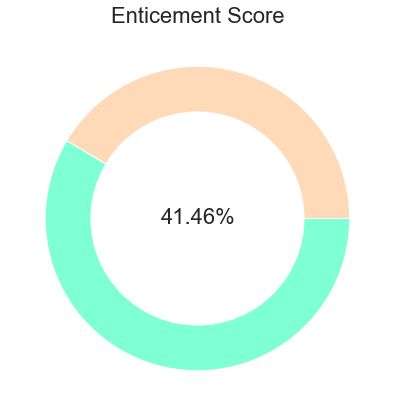

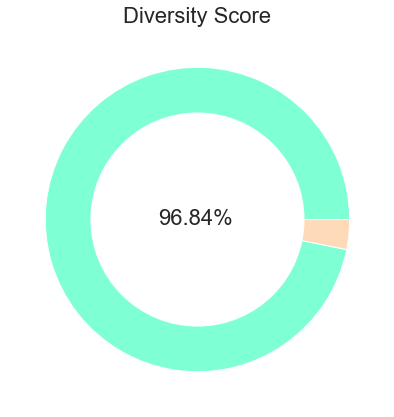

Results saved here:  /Users/adithya/anaconda3/lib/python3.7/site-packages/gym_push/envs/results/test/task1/
Evaluation results:

 [{'model': 'Adaboost', 'ctr_score': 62.94029209621993}, {'model': 'Decision Tree', 'ctr_score': 58.537371134020624}, {'model': 'Naive Bayes', 'ctr_score': 65.16323024054984}, {'metric': 'diversity_score', 'score': 96.84210526315789}, {'metric': 'enticement_score', 'score': 41.46262886597938}]


In [30]:
env.evaluate(pred)